In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data_dir = "/home/ucsd-train02/projects/single_cell_intestine/raw_data/"

In [5]:
data_dir+"batch1_counts.csv"

'/home/ucsd-train02/projects/single_cell_intestine/raw_data/batch1_counts.csv'

In [6]:
raw_counts = pd.read_csv(data_dir+"batch1_counts.csv", index_col=0)
print(raw_counts.shape)
raw_counts.head()

(15971, 1385)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B1_TTTAGAGAACGGAG_Enterocyte.Immature.Distal,B1_TTTAGAGAGGAAAT_Stem,B1_TTTAGGCTCTCTTA_Paneth,B1_TTTCACGAAGTGTC_TA.Early,B1_TTTCACGACACACA_Enterocyte.Progenitor.Early,B1_TTTCACGAGAGGCA_Stem,B1_TTTCCAGAACGCTA_Goblet,B1_TTTCCAGATGCAAC_Enterocyte.Progenitor,B1_TTTCGAACTACTGG_Stem,B1_TTTCTACTTCACCC_Enterocyte.Progenitor.Late
Mrpl15,2,1,2,2,0,4,0,1,4,0,...,0,3,1,1,0,4,2,3,0,3
Lypla1,2,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,3,0,0,3
Gm37988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tcea1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,0,1
Atp6v1h,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
(raw_counts > 0).sum(axis=1).head()

Mrpl15     866
Lypla1     479
Gm37988      1
Tcea1      213
Atp6v1h    217
dtype: int64

/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


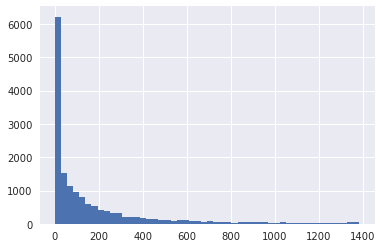

In [12]:
plt.hist((raw_counts > 0).sum(axis=1), bins=50)
plt.show()

In [16]:
num_cells = len(raw_counts.columns)*0.1
num_cells

138.5

In [19]:
(raw_counts > 0).sum(axis=1).head()

Mrpl15     866
Lypla1     479
Gm37988      1
Tcea1      213
Atp6v1h    217
dtype: int64

In [22]:
genes_to_keep = (raw_counts > 0).sum(axis=1) > num_cells
genes_to_keep.head()

Mrpl15      True
Lypla1      True
Gm37988    False
Tcea1       True
Atp6v1h     True
dtype: bool

In [24]:
counts_filtered = raw_counts.loc[genes_to_keep]
print(counts_filtered.shape)
counts_filtered.head()

(5355, 1385)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B1_TTTAGAGAACGGAG_Enterocyte.Immature.Distal,B1_TTTAGAGAGGAAAT_Stem,B1_TTTAGGCTCTCTTA_Paneth,B1_TTTCACGAAGTGTC_TA.Early,B1_TTTCACGACACACA_Enterocyte.Progenitor.Early,B1_TTTCACGAGAGGCA_Stem,B1_TTTCCAGAACGCTA_Goblet,B1_TTTCCAGATGCAAC_Enterocyte.Progenitor,B1_TTTCGAACTACTGG_Stem,B1_TTTCTACTTCACCC_Enterocyte.Progenitor.Late
Mrpl15,2,1,2,2,0,4,0,1,4,0,...,0,3,1,1,0,4,2,3,0,3
Lypla1,2,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,3,0,0,3
Tcea1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,0,1
Atp6v1h,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rb1cc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [25]:
counts_filtered.sum(axis=0).head()

B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal    5879
B1_AAACCGTGCCAAGT_Tuft                          2726
B1_AAACGCACAGCCTA_Goblet                        7517
B1_AAACGCACCAGATC_Endocrine                     8071
B1_AAACGCACCGCCTT_Stem                          6518
dtype: int64

/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


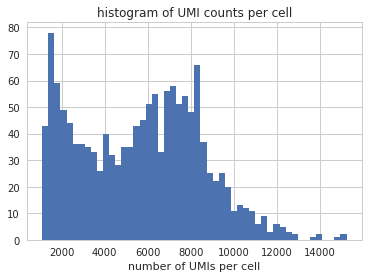

In [29]:
sns.set_style("whitegrid")

plt.hist(counts_filtered.sum(axis=0), bins=50)

plt.xlabel("number of UMIs per cell")
plt.title('histogram of UMI counts per cell')
plt.show()

/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


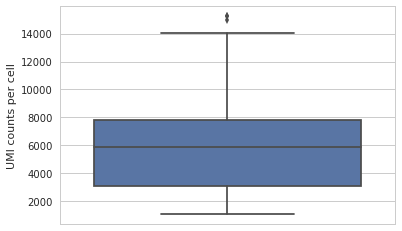

In [30]:
g = sns.boxplot(counts_filtered.sum(axis=0), orient='v')
g.set_ylabel("UMI counts per cell")

/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


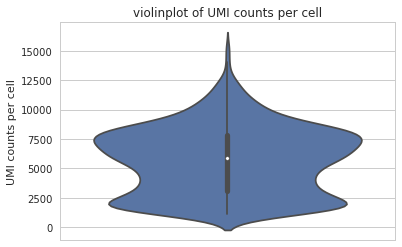

In [33]:
g = sns.violinplot(counts_filtered.sum(axis=0), orient='v')
g.set_ylabel("UMI counts per cell")
g.set_title("violinplot of UMI counts per cell")

In [40]:
total_umi_counts_per_gene = counts_filtered.sum(axis=1)

/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


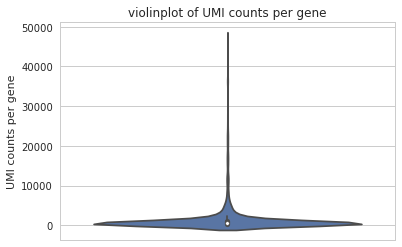

In [41]:
g = sns.violinplot(total_umi_counts_per_gene, orient='v')
g.set_ylabel("UMI counts per gene")
g.set_title("violinplot of UMI counts per gene")

/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


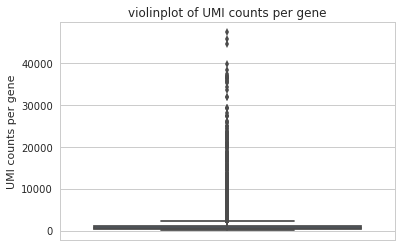

In [36]:
g = sns.boxplot(counts_filtered.sum(axis=1), orient='v')
g.set_ylabel("UMI counts per gene")
g.set_title("violinplot of UMI counts per gene")

/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


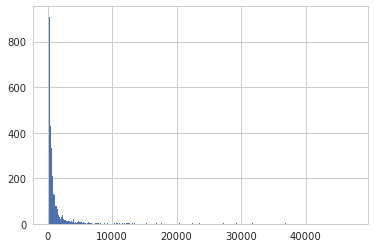

In [49]:
plt.hist(total_umi_counts_per_gene, bins=500)
#plt.xlim([0,1000])
plt.show()

In [ ]:
save_dir = "/home/ucsd-train02/projects/single_cell_intestine/results/"
counts_filtered.to_csv(save_dir+"counts_filtered.csv")